In [1253]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

### We check out our data

In [1254]:
df = pd.read_csv("/kaggle/input/hack-una-matata/Train.csv")
df

,Gender,Measures,Weights,Age
0,M,"(1.625, 1.3, 0.475)","(14.7133905, 8.674947, 12.65805175)",16
1,M,"(1.5875, 1.225, 0.4375)","(17.6617385, 7.66853975, 11.1980525)",11
2,F,"(1.675, 1.3, 0.4875)","(21.488921, 10.58853825, 14.33067225)",11
3,M,"(1.7375, 1.45, 0.5)","(19.1359125, 13.551061, 15.01106025)",13
4,I,"(1.0, 0.7875, 0.225)","(4.2807745, 1.927766, 2.26796)",6
...,...,...,...,...
3109,M,"(1.65, 1.325, 0.425)","(16.74037975, 6.010094, 12.8423235)",15
3110,F,"(1.2875, 1.0375, 0.35)","(8.83086925, 4.309124, 5.6699)",10
3111,M,"(1.2375, 0.9875, 0.3)","(6.350288, 3.89805625, 4.7343665)",8
3112,I,"(0.925, 0.725, 0.2)","(3.061746, 1.60174675, 1.984465)",6


### Clean Data

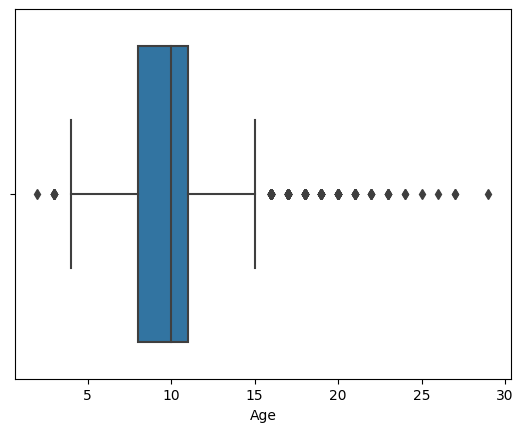

In [1255]:
sns.boxplot(x="Age", data=df);

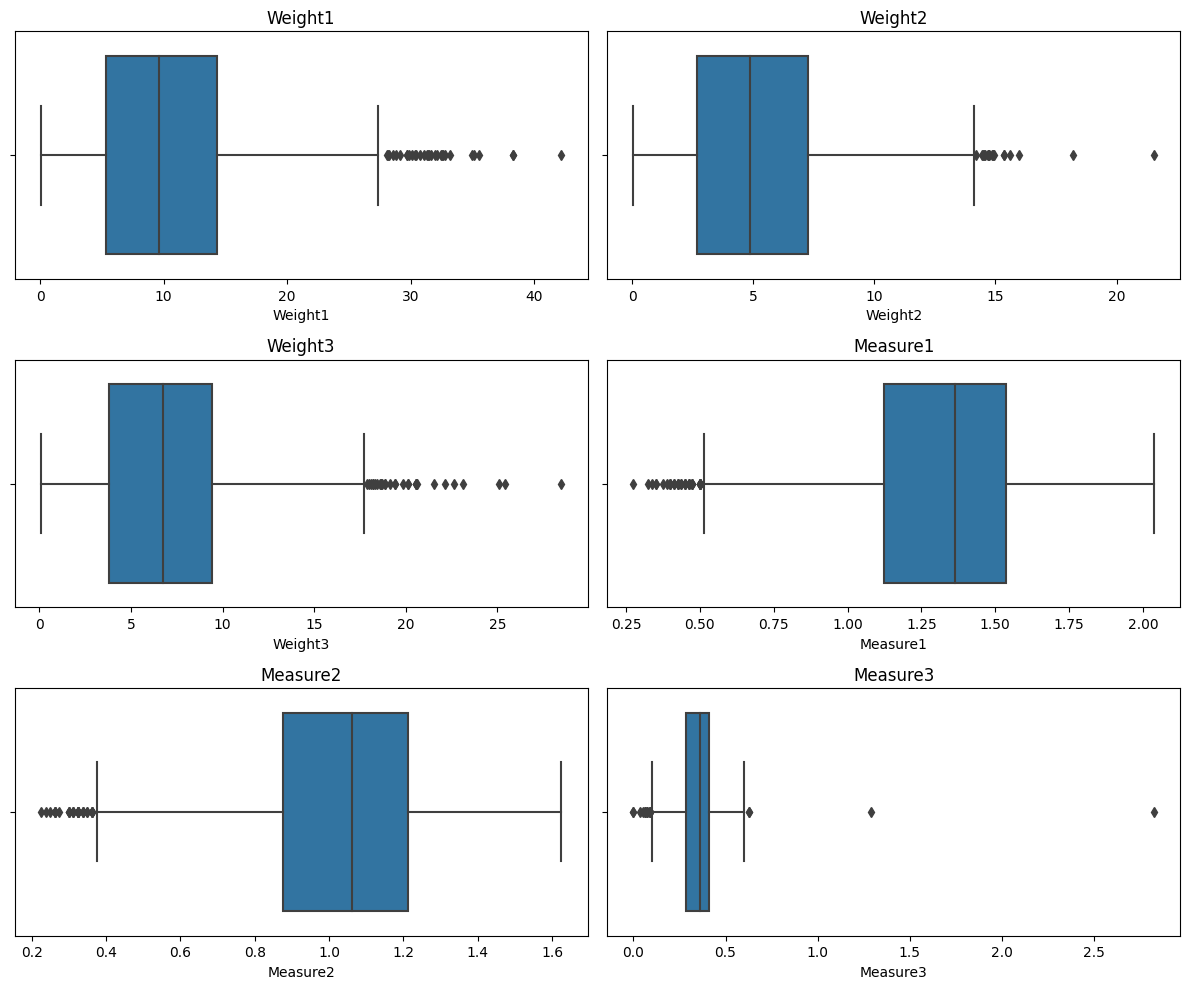

,Gender,Age,Measure1,Measure2,Measure3,Weight1,Weight2,Weight3
0,0,16,1.6250,1.3000,0.4750,14.713390,8.674947,12.658052
1,0,11,1.5875,1.2250,0.4375,17.661738,7.668540,11.198052
2,1,11,1.6750,1.3000,0.4875,21.488921,10.588538,14.330672
3,0,13,1.7375,1.4500,0.5000,19.135912,13.551061,15.011060
4,2,6,1.0000,0.7875,0.2250,4.280774,1.927766,2.267960
...,...,...,...,...,...,...,...,...
3109,0,15,1.6500,1.3250,0.4250,16.740380,6.010094,12.842323
3110,1,10,1.2875,1.0375,0.3500,8.830869,4.309124,5.669900
3111,0,8,1.2375,0.9875,0.3000,6.350288,3.898056,4.734367
3112,2,6,0.9250,0.7250,0.2000,3.061746,1.601747,1.984465


In [1256]:
df=df[(df['Age']<25) & (df['Age']>1)]

# Split 'Measures' into separate columns
df_measures = df['Measures'].apply(lambda x: pd.Series(map(float, x.strip('()').split(','))))
df_measures.columns = [f'Measure{i}' for i in range(1, df_measures.shape[1] + 1)]

# Split 'Weights' into separate columns
df_weights = df['Weights'].apply(lambda x: pd.Series(map(float, x.strip('()').split(','))))
df_weights.columns = [f'Weight{i}' for i in range(1, df_weights.shape[1] + 1)]

# Concatenate the new columns with the original DataFrame
df_final = pd.concat([df, df_measures, df_weights], axis=1)

# Drop the original 'Measures' and 'Weights' columns if needed
df_final.drop(['Measures', 'Weights'], axis=1,inplace=True)
df_final['Gender'].replace(['M','F','I'],[0,1,2],inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each boxplot
sns.boxplot(x="Weight1", data=df_final, ax=axes[0])
sns.boxplot(x="Weight2", data=df_final, ax=axes[1])
sns.boxplot(x="Weight3", data=df_final, ax=axes[2])
sns.boxplot(x="Measure1", data=df_final, ax=axes[3])
sns.boxplot(x="Measure2", data=df_final, ax=axes[4])
sns.boxplot(x="Measure3", data=df_final, ax=axes[5])

# Optional: Add a title to each subplot
axes[0].set_title("Weight1")
axes[1].set_title("Weight2")
axes[2].set_title("Weight3")
axes[3].set_title("Measure1")
axes[4].set_title("Measure2")
axes[5].set_title("Measure3")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

df_final=df_final[df_final['Weight1']<30]
df_final=df_final[df_final['Weight2']<20]
df_final=df_final[df_final['Weight3']<20]
df_final=df_final[df_final['Measure1']>0.1]
df_final=df_final[df_final['Measure2']>0.2]

# Display the cleaned DataFrame
df_final

# Spliting training data to train and test

In [1257]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['Age'], axis=1)  # Features
y = df_final['Age']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [1258]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1259]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 9.90546413, 10.83448758, 12.51620991, 10.51238004,  8.01806759,
       12.60038115, 10.76551121, 11.81718019,  9.18842243,  7.07805152,
       10.7859418 ,  7.93270242, 10.42467086, 10.20281089,  5.90412271,
       10.23356575,  8.22226092, 11.19106486, 12.58329019,  5.25290495,
       12.65454409,  5.80061235, 14.25584066,  8.83981379,  9.18529399,
       11.74855501,  6.50402348,  6.18702759, 13.05114333, 13.48499493,
       11.88954622,  8.32601043,  9.09730052,  8.07483619, 13.78512922,
        8.49915863,  9.95073075, 10.58751052,  6.6541783 ,  5.61250356,
       11.61141648,  9.050753  ,  8.46634076,  5.98082168, 11.7665296 ,
        8.59360542, 11.23600078,  9.49113359, 11.79535294, 11.83681197,
        9.46442079, 10.51452462, 10.8116741 ,  7.17818223, 13.94188353,
       12.71855111, 10.41135223, 14.06287833, 10.77924682, 10.63846762,
        6.5196396 ,  5.54033626, 13.51978209,  1.60945058,  7.65881296,
        8.46150736, 11.61553187,  9.53216149,  7.58155197, 10.72

In [1260]:
# Calculating the Coefficients
print(regressor.coef_)

[-3.95924845e-01 -7.31475667e-01  5.51903257e+00  3.41609372e+00
 -4.39110825e-01 -4.80186776e-03  7.49798817e-01]


In [1261]:
# Calculating the Intercept
print(regressor.intercept_)

3.8328357616723006


In [1262]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5356825516531003

## Correlation matrix

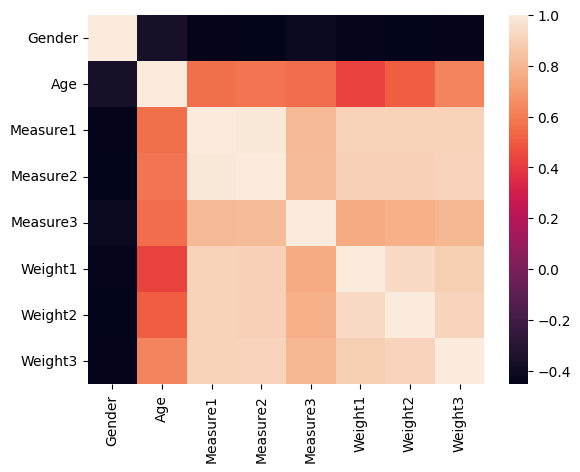

In [1263]:
# Calculate and plot
corr_matrix = df_final.corr()
sns.heatmap(corr_matrix);

## Features

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Measure1'}>],
       [<Axes: title={'center': 'Measure2'}>,
        <Axes: title={'center': 'Measure3'}>,
        <Axes: title={'center': 'Weight1'}>],
       [<Axes: title={'center': 'Weight2'}>,
        <Axes: title={'center': 'Weight3'}>, <Axes: >]], dtype=object)

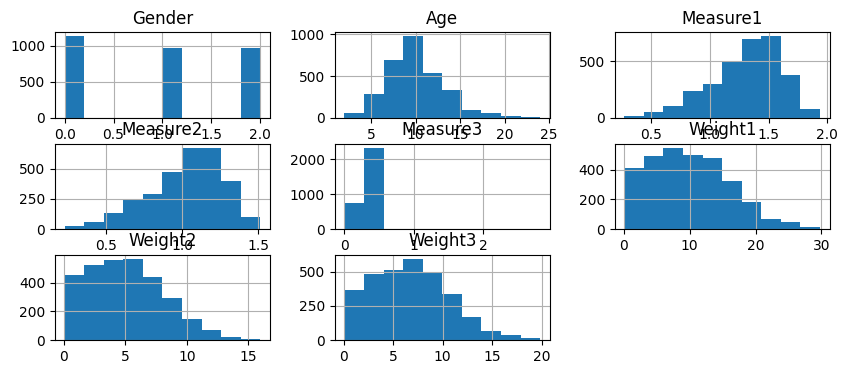

In [1264]:
df_final.hist(figsize=(10,4))

## Shifting age data to become a normal distribution using StandardScaler and avoiding overfitting with regulations

In [1265]:
# Standardize the features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up Ridge regression with cross-validation
alphas = np.logspace(-6, 6, 13)  # Range of alpha values to try
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  

# Fit the model on the training data
ridge_cv.fit(X_train_scaled, y_train)

# Get the optimal alpha value chosen by cross-validation
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print(f"Optimal alpha: {optimal_alpha}")

# Make predictions on the test set
y_pred = ridge_cv.predict(X_test_scaled)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

# Optionally, you can also access cross-validation values
cv_values = ridge_cv.cv_values_


Optimal alpha: 1e-06
Mean Squared Error on test set: 4.628916617542558


## Evaluate the model on test data

In [1266]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Different Metrics
def evaluate_model(model, X_test_scaled, y_test):
    y_predtest = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_predtest)
    mae = mean_absolute_error(y_test, y_predtest)
    r2 = r2_score(y_test, y_predtest)
    return mse, mae, r2

# Evaluate Linear Regression
linear_regression_metrics = evaluate_model(regressor,  X_test, y_test)
print("Linear Regression Metrics: MSE={}, MAE={}, R2={}".format(*linear_regression_metrics))

Linear Regression Metrics: MSE=4.628916632998486, MAE=1.5859401849000259, R2=0.5356825516531003


## Evaluate the model on train data

In [1267]:
# Evaluate Different Metrics
def evaluate_model(model, X_train_scaled, y_train):
    y_predtrain = model.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_predtrain)
    mae = mean_absolute_error(y_train, y_predtrain)
    r2 = r2_score(y_train, y_predtrain)
    return mse, mae, r2

# Evaluate Linear Regression
linear_regression_metrics = evaluate_model(regressor,  X_train, y_train)
print("Linear Regression Metrics: MSE={}, MAE={}, R2={}".format(*linear_regression_metrics))

Linear Regression Metrics: MSE=4.8239319652897255, MAE=1.599218655687319, R2=0.5154258755942049


## Submission


In [1268]:
test = pd.read_csv("/kaggle/input/hack-una-matata/Test.csv")

#we MUST do the same treatments that we did on the training set
# Split 'Measures' into separate columns
test_measures = test['Measures'].apply(lambda x: pd.Series(map(float, x.strip('()').split(','))))
test_measures.columns = [f'Measure{i}' for i in range(1, test_measures.shape[1] + 1)]

# Split 'Weights' into separate columns
test_weights = test['Weights'].apply(lambda x: pd.Series(map(float, x.strip('()').split(','))))
test_weights.columns = [f'Weight{i}' for i in range(1, test_weights.shape[1] + 1)]

# Concatenate the new columns with the original DataFrame
test_final = pd.concat([test, test_measures, test_weights], axis=1)

# Drop the original 'Measures' and 'Weights' columns if needed
test_final.drop(['Measures', 'Weights'], axis=1,inplace=True)
test_final['Gender'].replace(['M','F','I'],[0,1,2],inplace=True)


# Display the cleaned DataFrame
test_final


,Gender,Measure1,Measure2,Measure3,Weight1,Weight2,Weight3
0,2,0.7750,0.5875,0.1750,1.786018,1.148155,1.275727
1,0,1.1625,0.8875,0.3000,7.725239,2.749901,3.954755
2,1,1.0875,0.8750,0.3000,5.443104,2.834950,3.685435
3,2,1.3500,0.9875,0.3375,7.668540,4.394172,5.443104
4,2,0.8250,0.6000,0.1875,2.112038,0.935534,1.360776
...,...,...,...,...,...,...,...
774,0,1.3125,1.0375,0.3375,11.169703,5.358055,5.726599
775,0,0.3875,0.2750,0.1000,0.184272,0.085048,0.141747
776,2,0.9000,0.6875,0.1875,2.792426,1.247378,1.871067
777,2,1.0875,0.8500,0.3000,5.032036,2.296310,3.543687


In [1269]:

y_hat = regressor.predict(test_final)
submission = pd.read_csv("/kaggle/input/hack-una-matata/sample_submission.csv")
submission.Age = y_hat.reshape(-1)
submission.to_csv("Submission.csv", index = False)